Unsupervised Learning - Clustering

In [17]:
import pandas as pd

# Lade den Datensatz
df = pd.read_csv("C:\\Users\\sonja\\Downloads\\food.csv")

# Zeige die ersten 5 Zeilen, um den Datensatz zu überprüfen
print(df.head())



       Unnamed: 0  RedMeat  WhiteMeat  Eggs  Milk  Fish  Cereals  Starch  \
0         Albania     10.1        1.4   0.5   8.9   0.2     42.3     0.6   
1         Austria      8.9       14.0   4.3  19.9   2.1     28.0     3.6   
2         Belgium     13.5        9.3   4.1  17.5   4.5     26.6     5.7   
3        Bulgaria      7.8        6.0   1.6   8.3   1.2     56.7     1.1   
4  Czechoslovakia      9.7       11.4   2.8  12.5   2.0     34.3     5.0   

   Nuts  Fr.Veg  
0   5.5     1.7  
1   1.3     4.3  
2   2.1     4.0  
3   3.7     4.2  
4   1.1     4.0  


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Schließe die erste Spalte aus (Länder) und wende die Standardisierung nur auf die restlichen Spalten an
df_scaled = df.copy()  # Eine Kopie des Original-DataFrames erstellen, um die ersten Spalte zu behalten
df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])  # Standardisiere nur die Spalten ab der zweiten (Index 1)




k=2, Silhouette Score=0.41814496977065707
k=3, Silhouette Score=0.33155079457016895
k=4, Silhouette Score=0.3821282383613304
k=5, Silhouette Score=0.29500298699763905


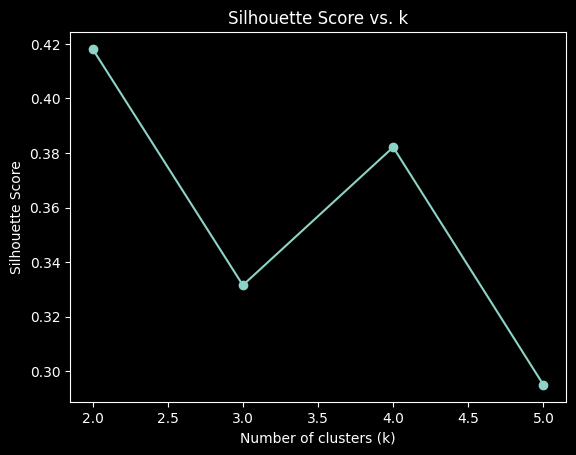

Best k: 2


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df_scaled = df.select_dtypes(include=[float, int]).copy()  # Nur numerische Spalten auswählen
silhouette_scores = []

# Variiere k von 2 bis 5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    
    # Berechne den Silhouettenkoeffizienten
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f'k={k}, Silhouette Score={score}')

# Visualisiere die Silhouettenkoeffizienten
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. k")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Bestes k auswählen (höchster Silhouettenkoeffizient)
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 weil range von 2 bis 5 geht
print(f"Best k: {best_k}")


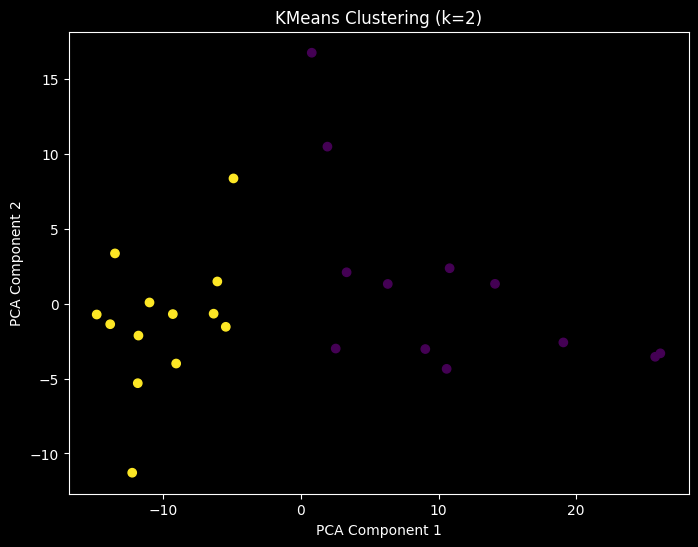

In [31]:
from sklearn.decomposition import PCA

# Wende KMeans mit dem besten k an
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans.fit(df_scaled)  

# Reduziere die Dimensionen mit PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Visualisiere die Cluster
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


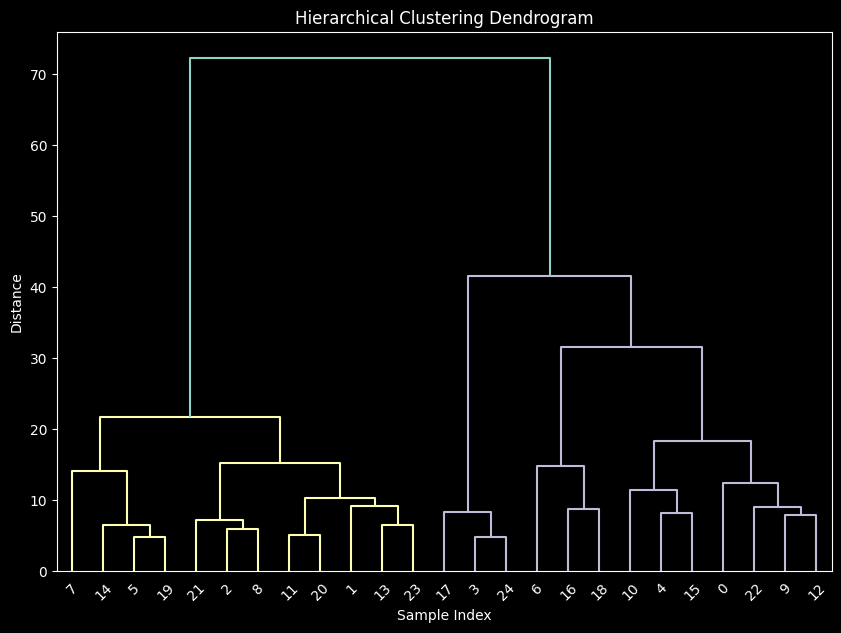

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Stellt sicher, dass df_scaled nur numerische Werte enthält und keine NaN-Werte
df_scaled = df_scaled.select_dtypes(include=[float, int])  # Nur numerische Spalten behalten
df_scaled = df_scaled.dropna()  # Entferne alle Zeilen mit fehlenden Werten

# Hierarchisches Clustering (Verwendung von Ward als Methode)
Z = linkage(df_scaled, method='ward')

# Dendrogramm plotten
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


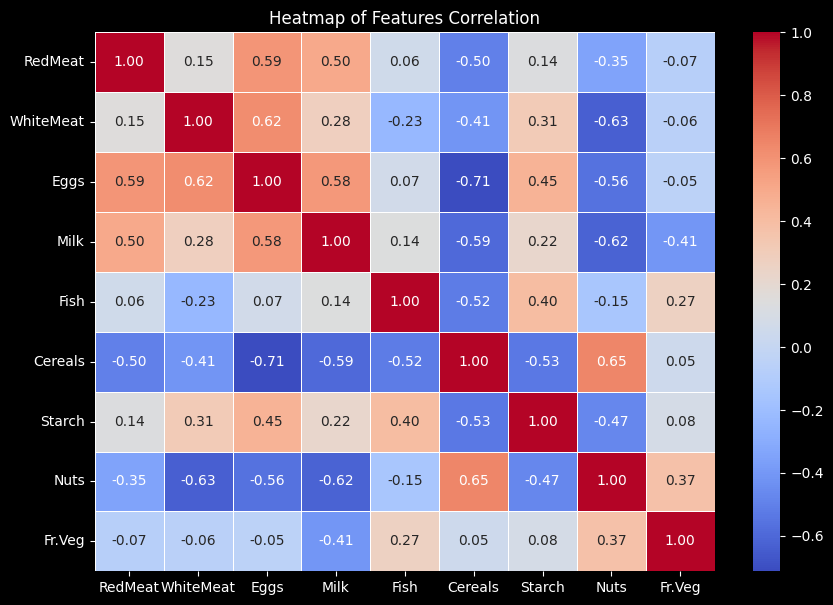

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nur numerische Spalten auswählen
df_numeric = df.select_dtypes(include=[float, int])

# Berechne die Korrelation zwischen den numerischen Spalten
correlation_matrix = df_numeric.corr()

# Erstelle die Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Features Correlation")
plt.show()


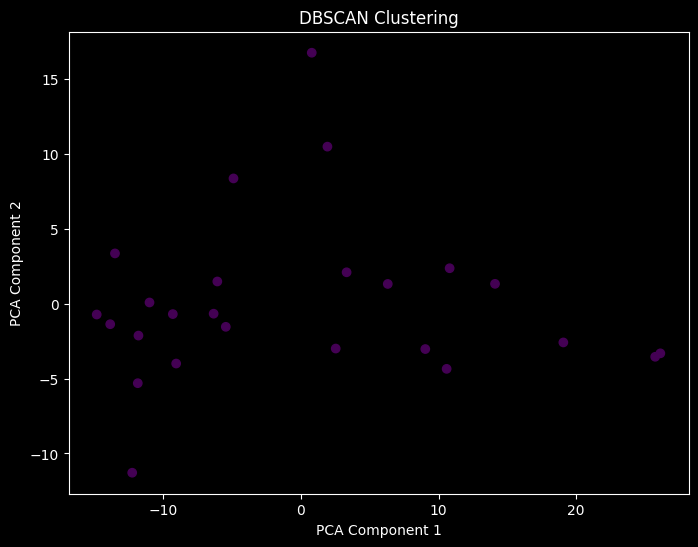

In [38]:
from sklearn.cluster import DBSCAN

# Visualisierung der DBSCAN-Ergebnisse
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
